### Cost Function

j(∅o,∅1) = 1/2m*∑(h∅(xi) - yi)^2 # Mean Squred Error

##### Final Aim

- Minimize the error/cost Function



### Multiple Linear Regression
- In which more than one independent features and one dependent feature. 

### Performance Matrix
- R squared
    - 1 - ss(res)/ss(total)
    - 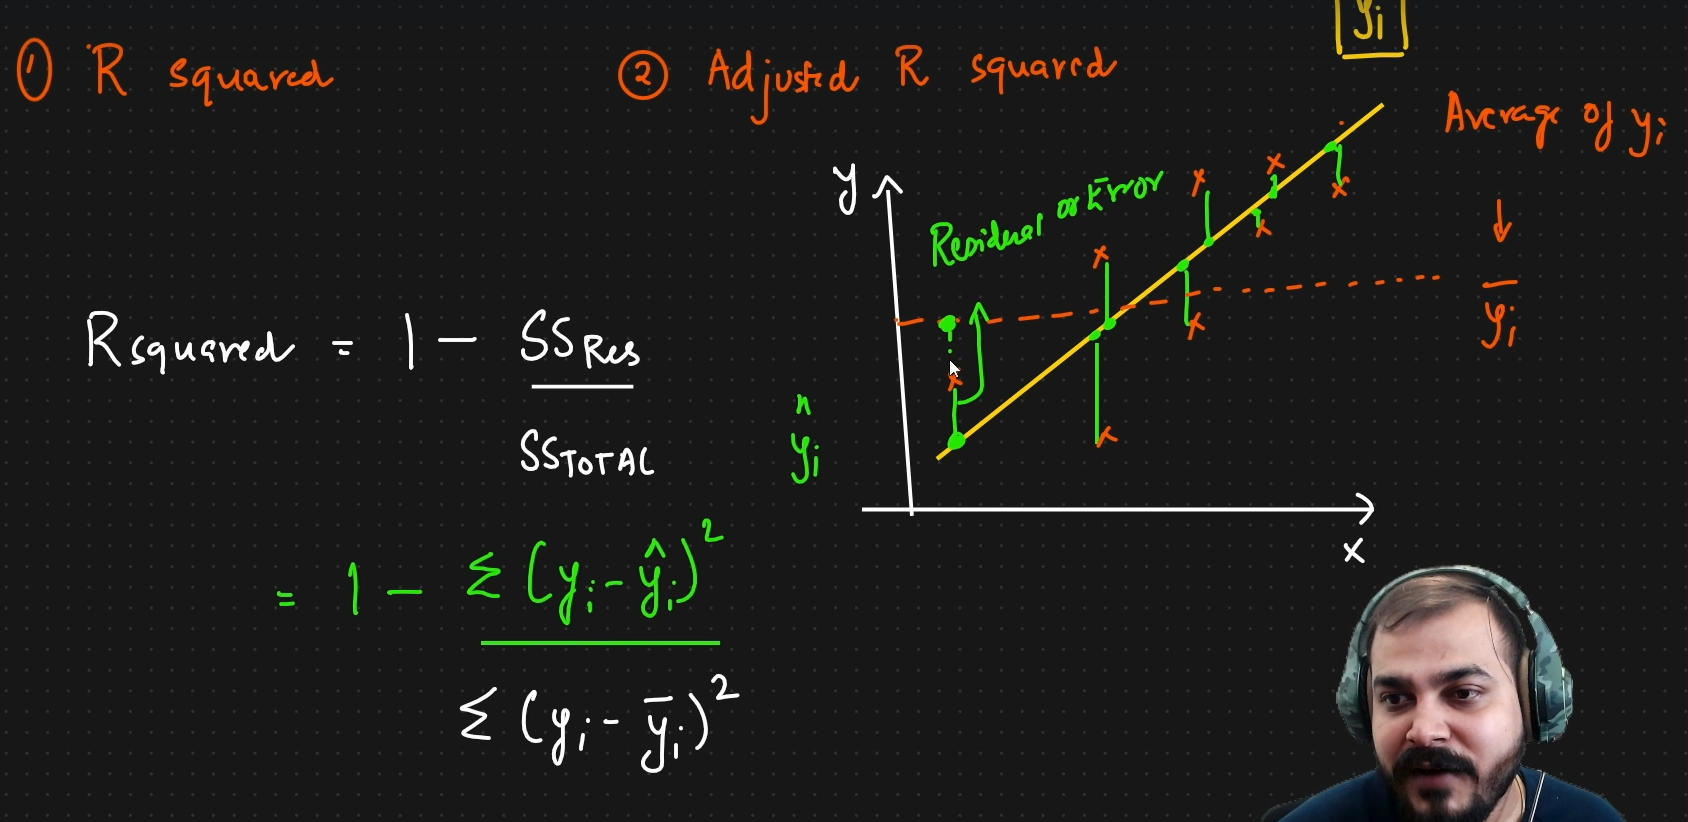
    - 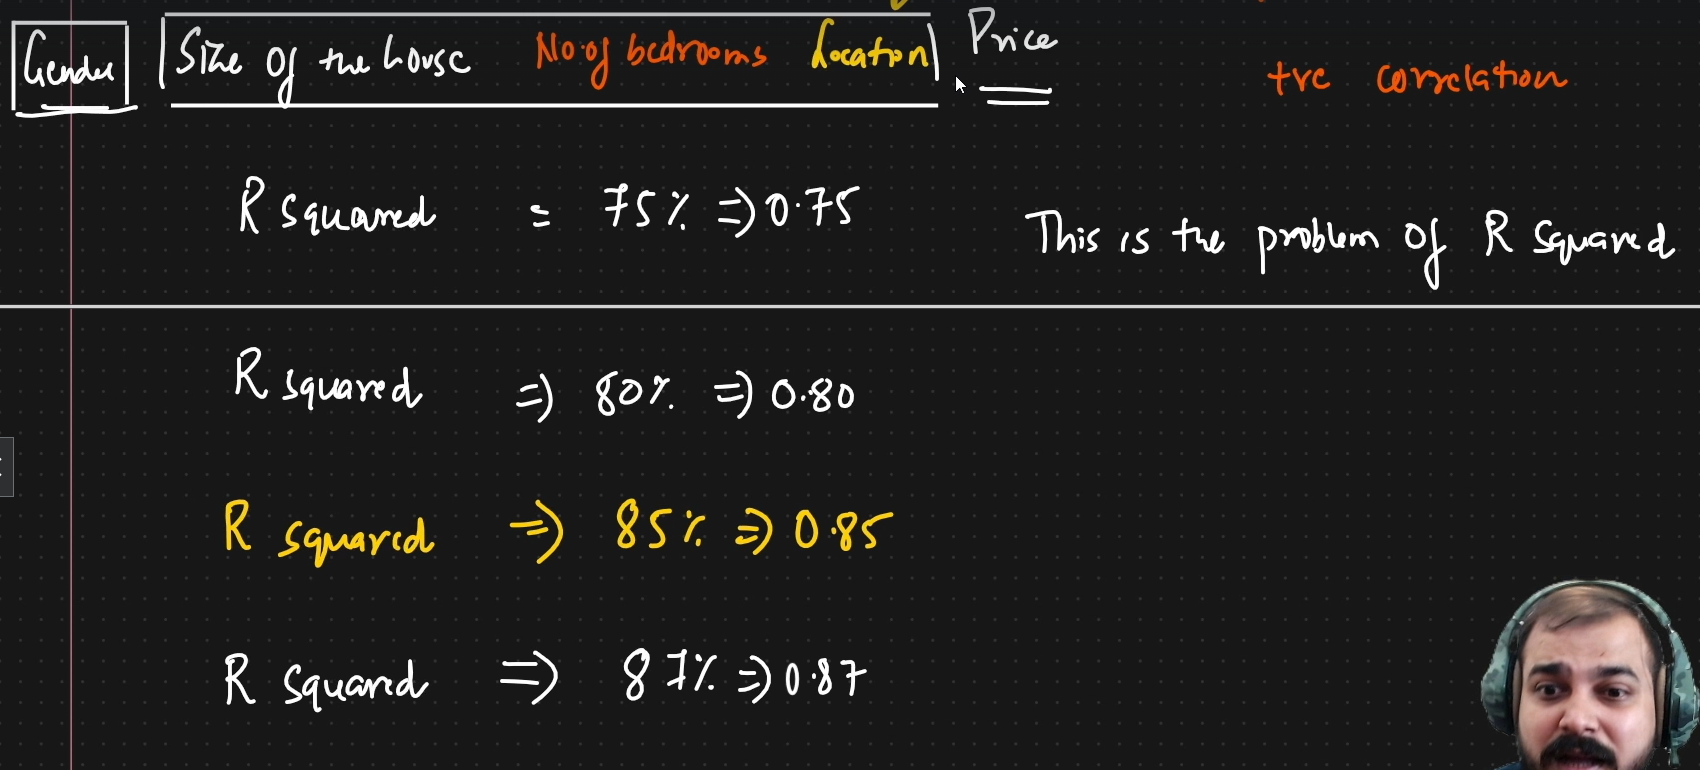
- adjusted R squared
    - 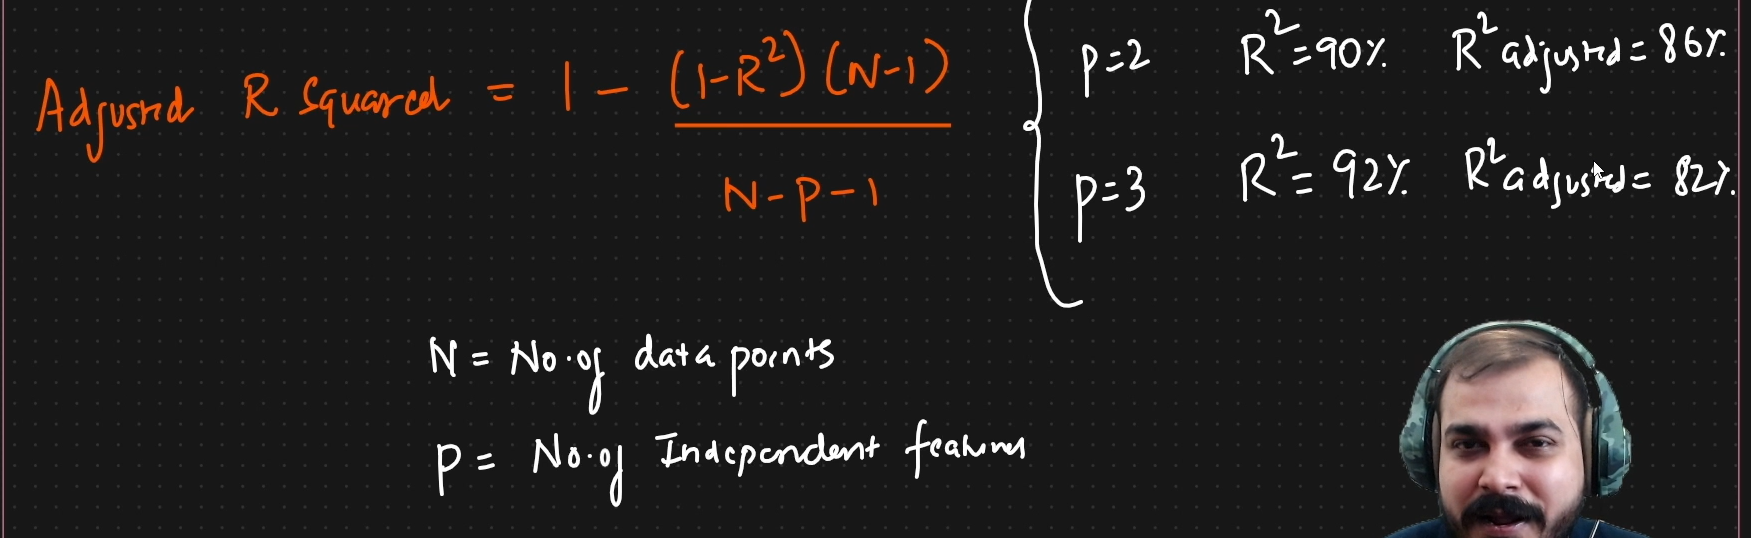
- MSE
    - 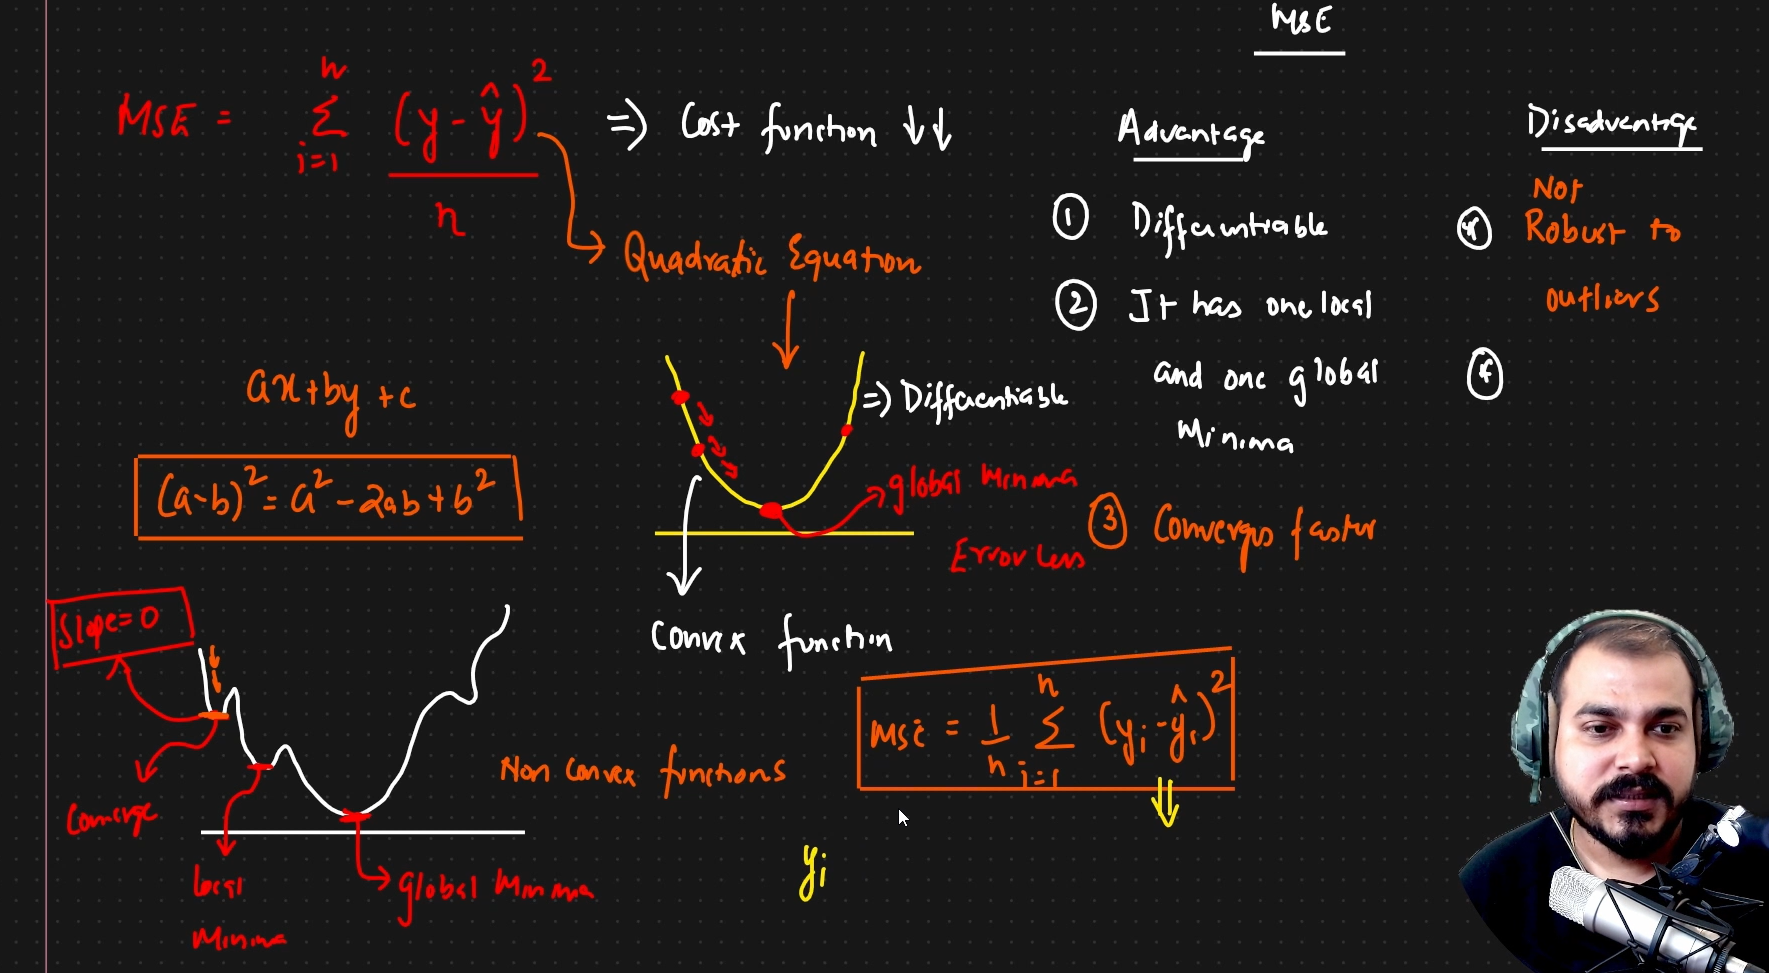
    - dis adv - it is no longer in same unit
- MAE
    - 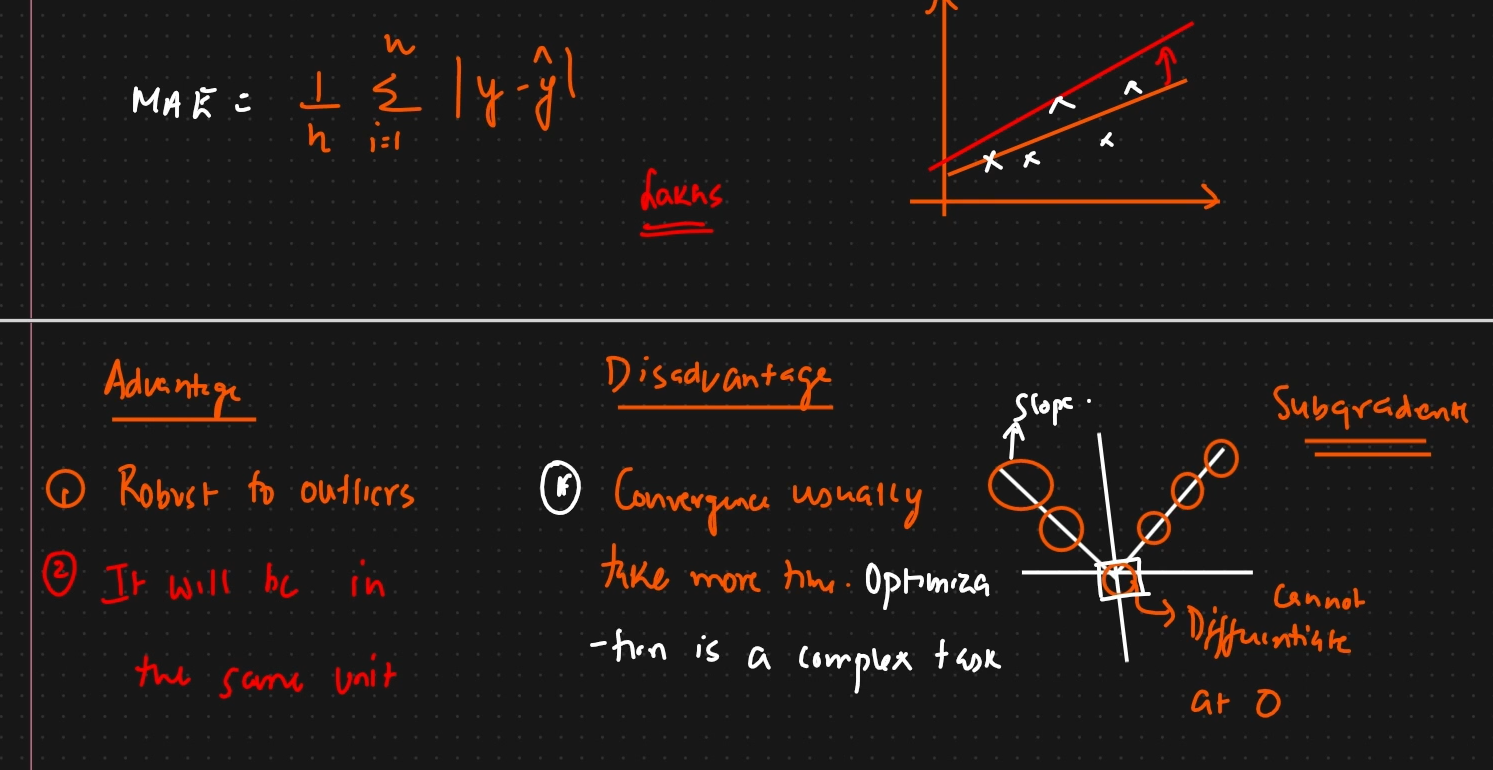
- RMSE
    - 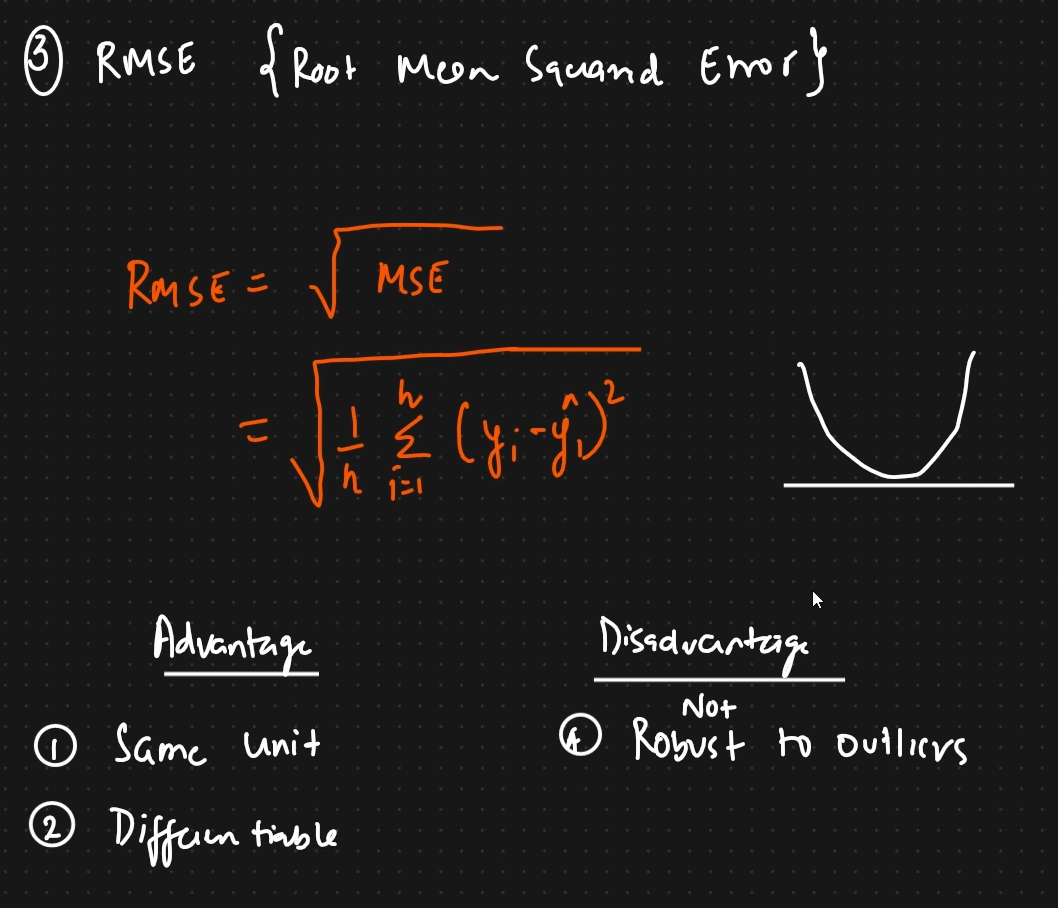
    

### Over Fitting and Under Fitting
Data -> train data -> train 
                   -> validation (for hyper parameter tuning model)
     -> test data

- 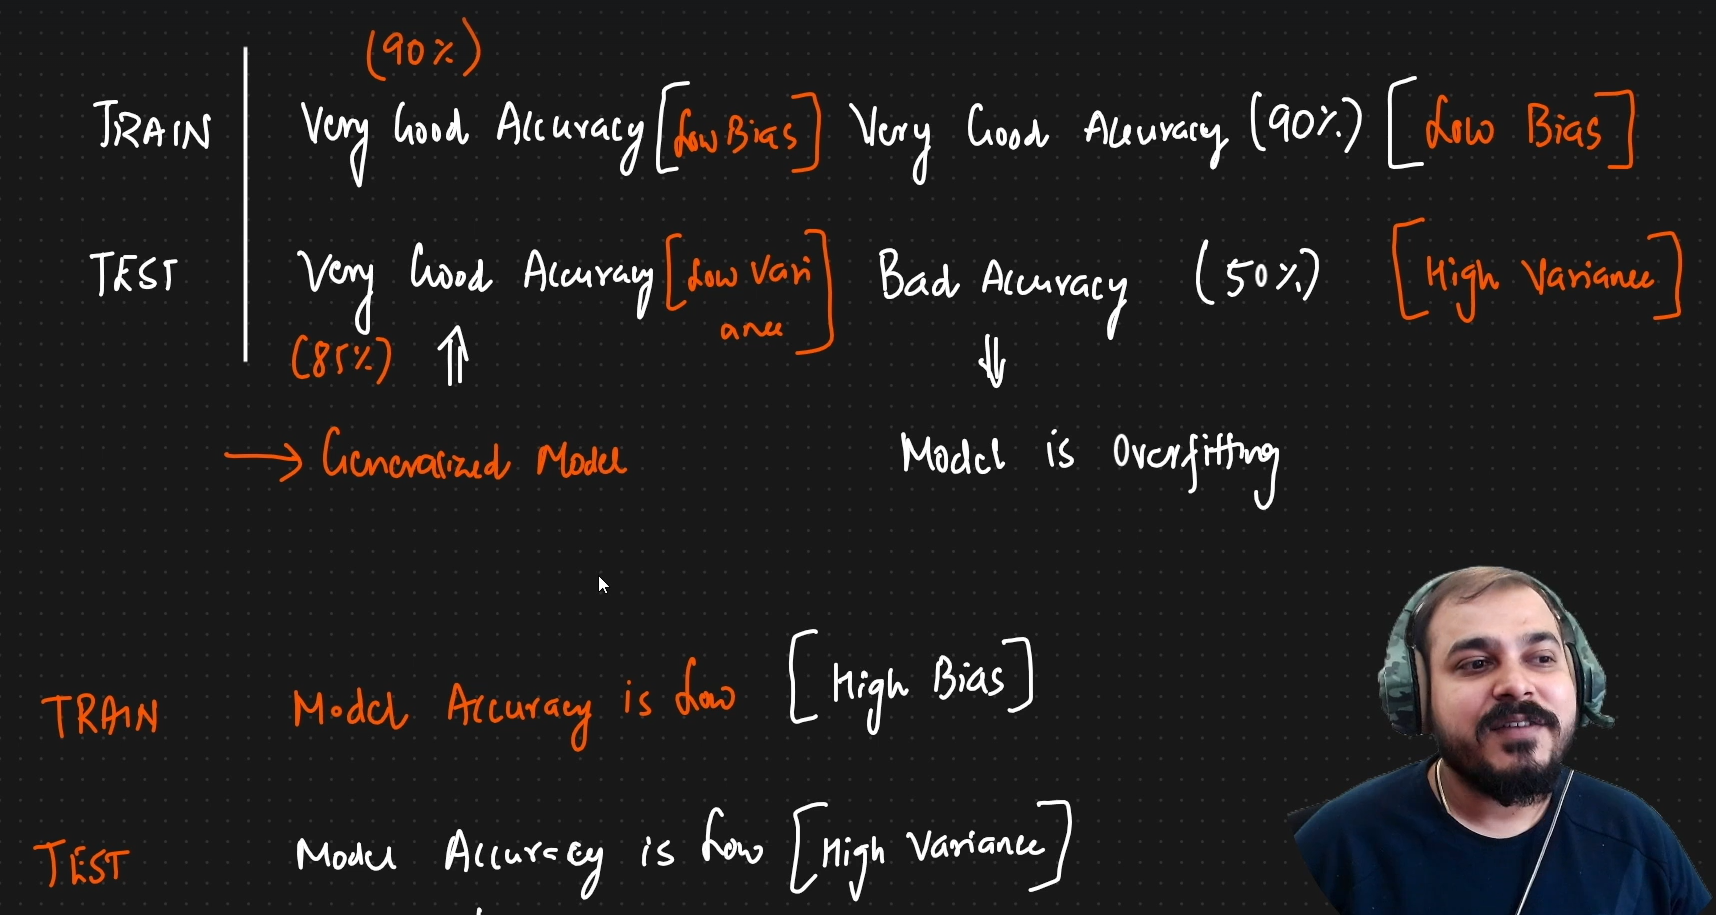
    

## Linear Regression with OLS (ordinary least Square)
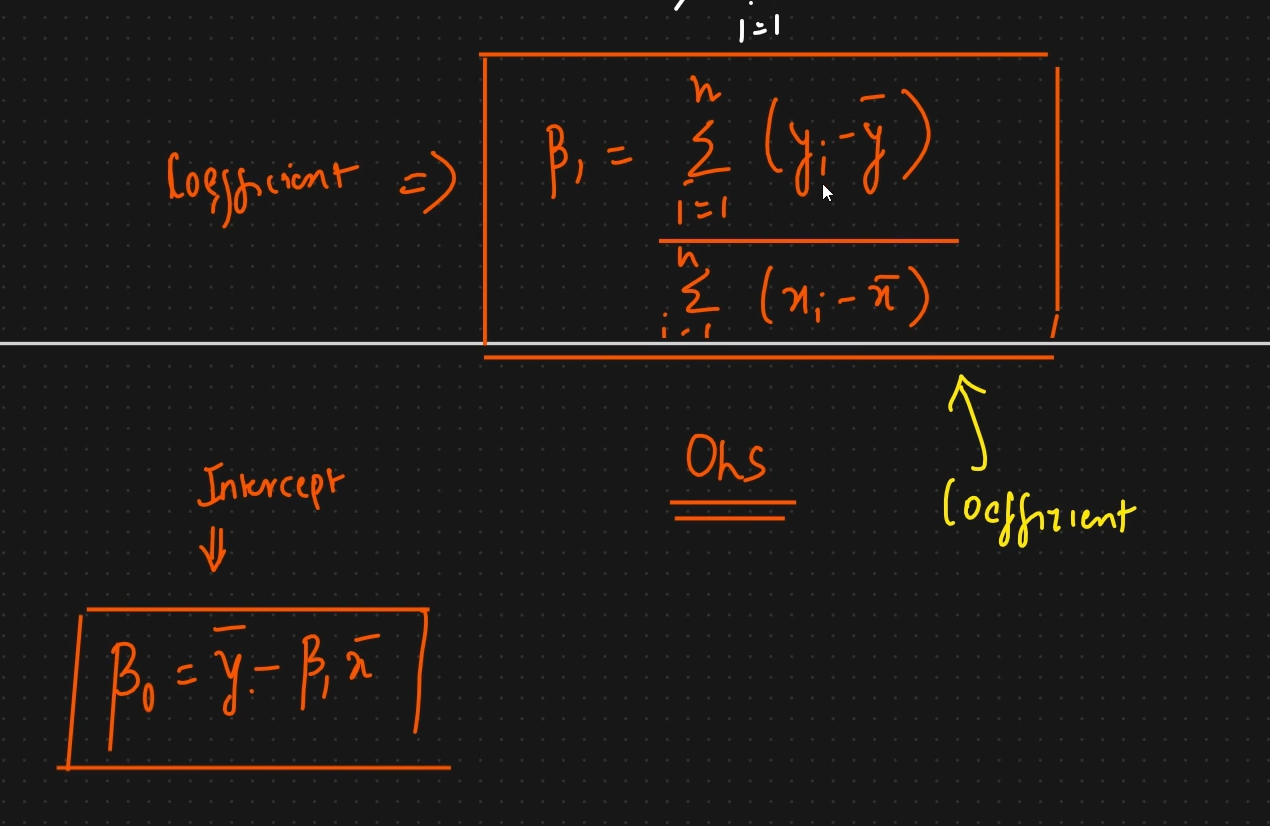
see the derivation if needed

### Linear Regression Practical


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

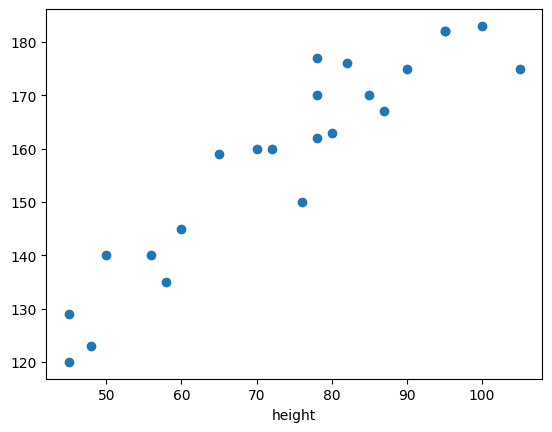

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.xlabel('height')
plt.show()

In [7]:
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

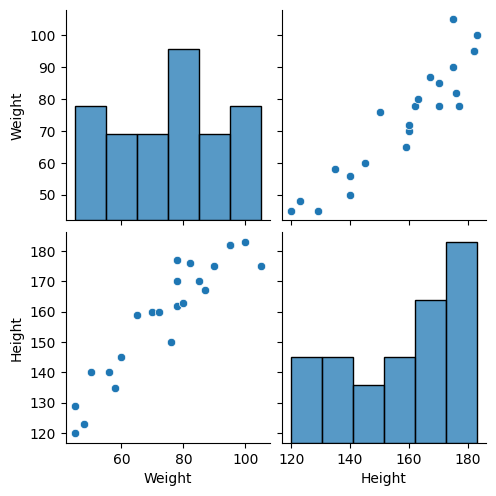

In [9]:
### Seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [17]:
## independent and dependent
df.head()
X = df[['Weight']] # independent feature should be data frame or 2 dimensional array
y = df['Height']  # dependent feature can be a 1-d array or series.



In [18]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
# Stadardization
#  mean = 0 sd = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [24]:
### apply Simple Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

In [25]:
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [27]:
model.coef_
model.intercept_

np.float64(156.47058823529412)

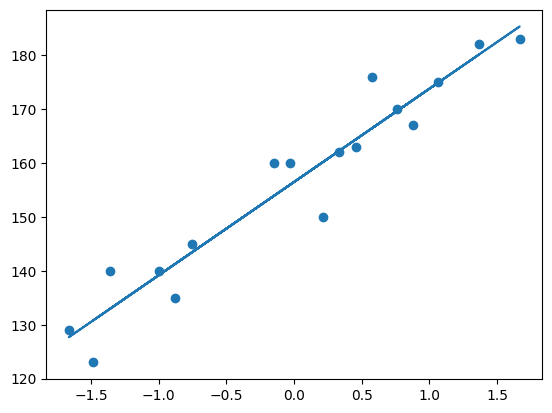

In [29]:
### plot the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))
plt.show()

In [30]:
## prediction for test data
y_pred = model.predict(X_test)

In [32]:
## performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

114.84069295228699 9.66512588679501 10.716374991212605


In [34]:
## R2

from sklearn.metrics import r2_score
score_r2 = r2_score(y_test,y_pred)
print(score_r2)

0.7360826717981276


In [37]:
#OLS Linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [38]:
model.predict(X_test)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                       0.664
Time:                        17:13:22   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

f:\ML Revise\krishenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### prediction for new value

In [44]:
model.predict(scaler.transform([[72]]))

f:\ML Revise\krishenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-0.49314119])